In [33]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt

iris = pd.read_csv("datasets/iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [34]:
X = iris.drop(columns={
    'species'
})
y = iris['species']

model = RandomForestClassifier(n_estimators=100, bootstrap=True, max_samples=0.7, max_features=0.75, random_state=123)

cv_scores = cross_val_score(model, X, y, cv=10)

print(f'Fold-specific accuracies: {cv_scores}')
print(f'Overall accuracy (avg. of folds): {cv_scores.mean():.4f}')

Fold-specific accuracies: [1.         0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.86666667 1.         1.         1.        ]
Overall accuracy (avg. of folds): 0.9600


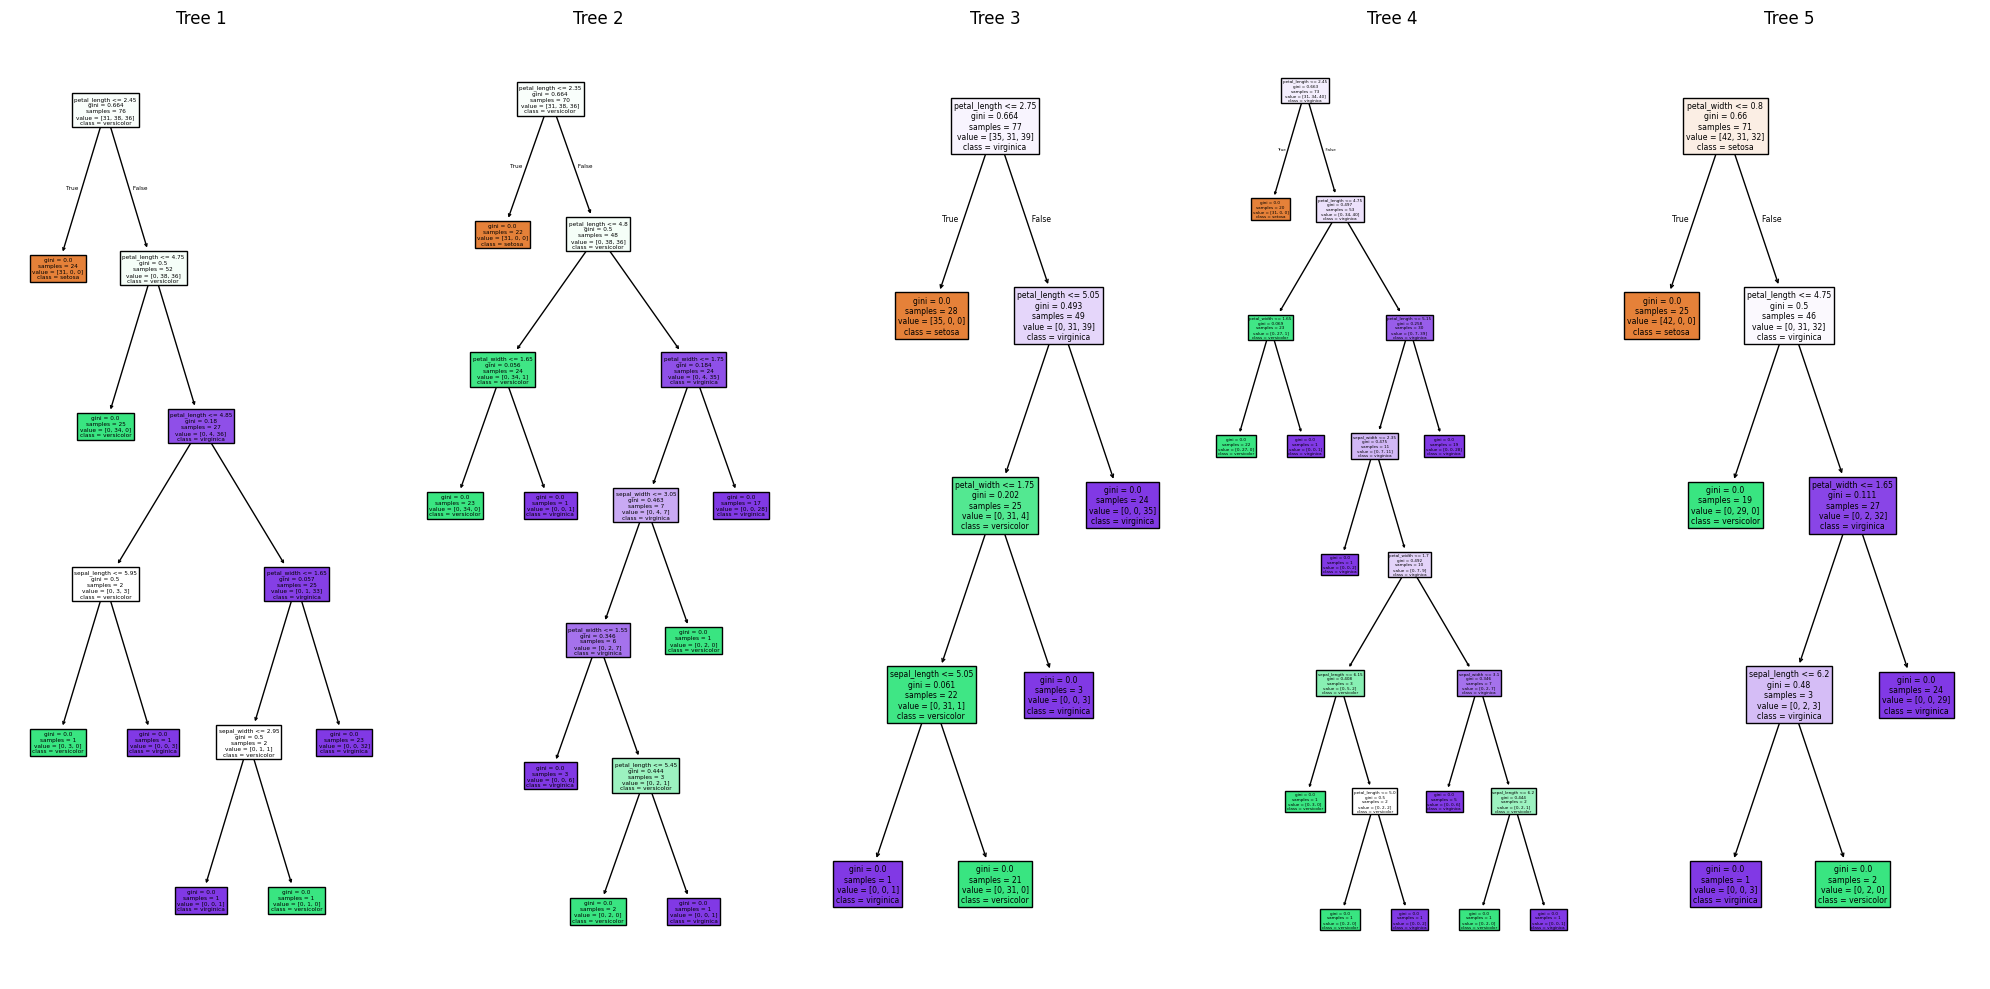

In [35]:
model = RandomForestClassifier(n_estimators=100, bootstrap=True, max_samples=0.7, max_features=0.75, random_state=123)
model.fit(X, y)

# Number of trees to plot
n_trees_to_plot = 5

plt.figure(figsize=(20, 10))

for i in range(n_trees_to_plot):
    plt.subplot(1, n_trees_to_plot, i + 1)  # 1 row and n_trees_to_plot columns
    plot_tree(model.estimators_[i], filled=True,
              feature_names= X.keys(), class_names=['setosa', 'versicolor', 'virginica'])
    plt.title(f'Tree {i + 1}')

plt.tight_layout()
plt.show()

In [36]:
print (model.feature_importances_)

[0.01426822 0.01436214 0.51040072 0.46096892]


In [37]:
# read data (replace with your own path)
df = pd.read_csv('datasets/titanic_v2.csv', sep=';')
# drop rows with missing values
df.dropna(axis=0, how='any', inplace=True)
display(df)

,pclass,sex,age,survived
0,1,female,29.0000,1
1,1,male,0.9167,1
2,1,female,2.0000,0
3,1,male,30.0000,0
4,1,female,25.0000,0
...,...,...,...,...
1301,3,male,45.5000,0
1304,3,female,14.5000,0
1306,3,male,26.5000,0
1307,3,male,27.0000,0


In [38]:
colnames = df.columns
colnames

Index(['pclass', 'sex', 'age', 'survived'], dtype='str')

In [39]:
# type conversions
# Note that DecisionTreeClassifier can't use strings in explanatory variables
df['sex'] = df['sex'].map({'male': 1, 'female': 2})
df.describe()

,pclass,sex,age,survived
count,1046.000000,1046.000000,1046.000000,1046.000000
mean,2.207457,1.370937,29.881135,0.408222
std,0.841497,0.483287,14.413500,0.491740
min,1.000000,1.000000,0.166700,0.000000
25%,1.000000,1.000000,21.000000,0.000000
50%,2.000000,1.000000,28.000000,0.000000
75%,3.000000,2.000000,39.000000,1.000000
max,3.000000,2.000000,80.000000,1.000000


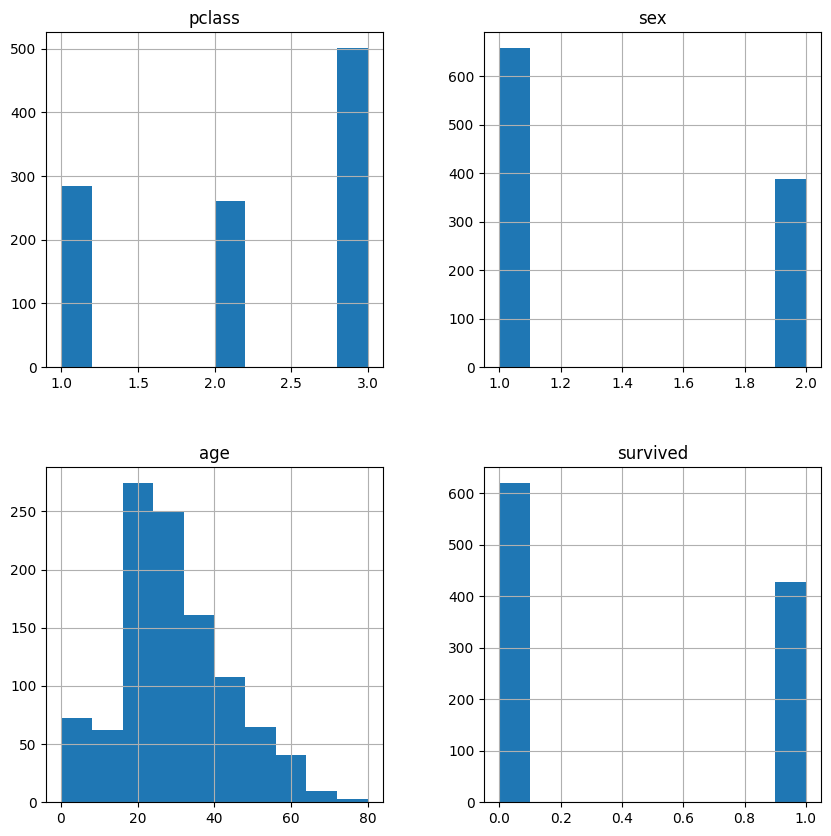

In [40]:
df.hist(figsize=(10, 10))
plt.show()

In [41]:
# extract explanatory variables into a data frame
X = df.loc[:, 'pclass':'age']
# extract response variable (class variable) into a series
Y = df.loc[:, 'survived']

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

In [42]:
# Create a random forest classifier and train it
model = RandomForestClassifier(n_estimators=100, bootstrap=True, max_samples=0.7, min_samples_leaf=30, random_state=123)

model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",30
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metri

In [44]:
# Display the confusion matrix and the classification report
y_pred = model.predict(X_test)
print(f'Confusion matrix:\n{confusion_matrix(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Display the feature importances
print(model.feature_importances_)

Confusion matrix:
[[186   3]
 [ 62  63]]
              precision    recall  f1-score   support

           0       0.75      0.98      0.85       189
           1       0.95      0.50      0.66       125

    accuracy                           0.79       314
   macro avg       0.85      0.74      0.76       314
weighted avg       0.83      0.79      0.77       314

[0.28484355 0.61249565 0.1026608 ]


[0.28484355 0.61249565 0.1026608 ]


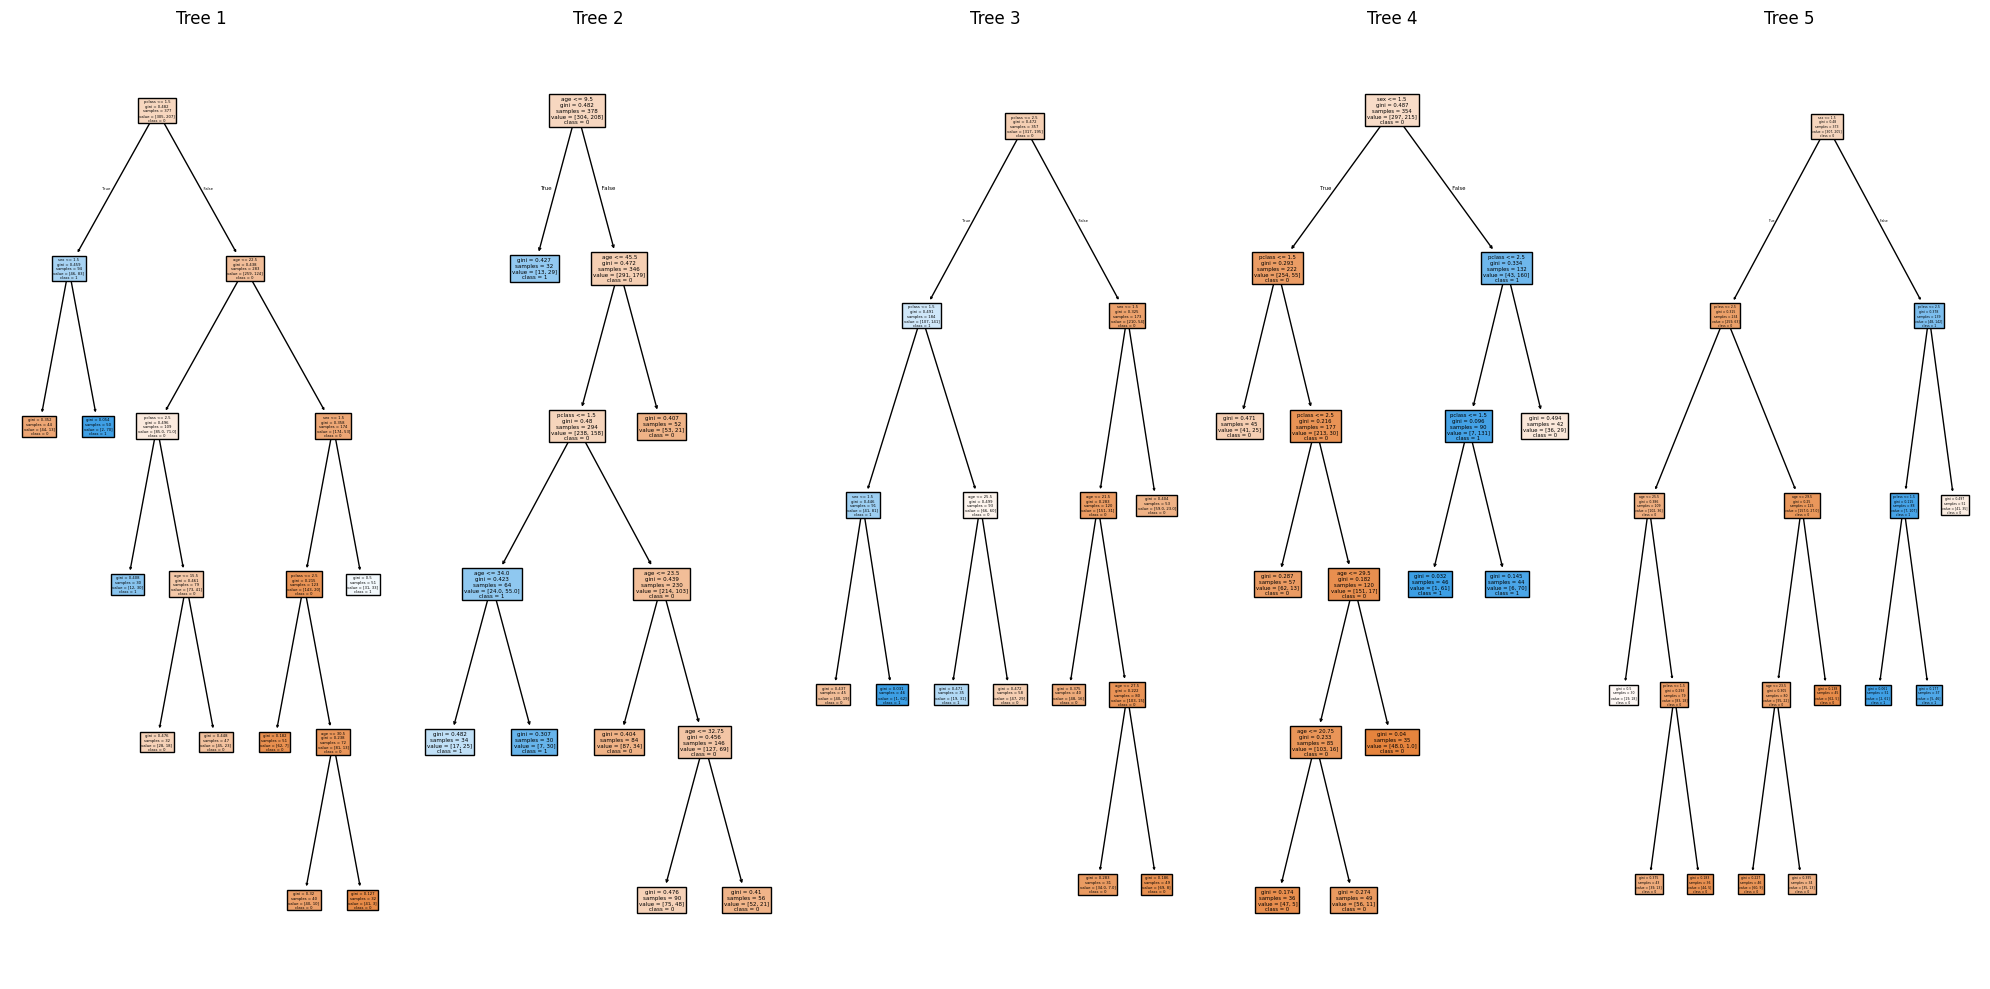

In [45]:
# Display the feature importances
print(model.feature_importances_)

# Peek a few trees
plt.figure(figsize=(20, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plot_tree(model.estimators_[i], filled=True, feature_names=colnames[:-1], class_names=['0', '1'])
    plt.title(f'Tree {i + 1}')
plt.tight_layout()
plt.show()

# Output the first tree into a file
from sklearn.tree import export_text
tree_text = export_text(model.estimators_[0], feature_names=colnames[:-1].tolist())
with open('tree.txt', 'w') as f:
    f.write(tree_text)

In [46]:
preds = model.predict(X_test)
confusion_matrix(y_test, preds)

array([[186,   3],
       [ 62,  63]], dtype=int64)